In [2]:
import json
import matplotlib.pyplot as plt

In [3]:
profile_list = []
with open('143dataall.json', 'r') as f:
    for n in f.readlines():
        d = json.loads(n)
        profile_list.append(d)

In [4]:
totalStudent = len(profile_list)

In [5]:
totalStudent

852

In [6]:
firstMajor = {}
majorChange = {}

In [7]:
n = 0
idx = 0
m = 0
not_Uni = False
for i in profile_list:
    if 'education' not in i:
        continue
    edu = i['education']    
    idx += 1
    if len(edu) > 1:
        n += 1
        for e in edu:
            if 'fieldOfStudy' not in e:
                not_Uni = True    
    if not_Uni:
        n -= 1
        not_Uni = False
        continue
        
    if len(edu) > 1:
        
        first = edu[0]['fieldOfStudy']
        
        if first.lower() not in firstMajor:
            firstMajor[first.lower()] = 0
        
        for i in range(1, len(edu)):
            second = edu[i]['fieldOfStudy']
            
            if second.lower() != first.lower():
                firstMajor[first.lower()] += 1
                
        if first.lower() not in majorChange:
            majorChange[first.lower()] = []
        
        for i in range(1, len(edu)):
            second = edu[i]['fieldOfStudy']
            
            if second.lower() != first.lower():
                
                majorChange[first.lower()].append(second.lower())

In [8]:
changeStudent = 0

In [9]:
firstMajorList = []
for k, v in firstMajor.items():
    firstMajorList.append((v,k))
    changeStudent += v

In [10]:
changeStudent

550

In [11]:
firstMajorList.sort(reverse=True)

In [12]:
csCount = 0

In [13]:
li = firstMajorList.copy()

In [14]:
i = 0
leng = len(li)
while i < leng:
    n, m = li[i]
    if 'computer science' in m:
        print(m)
        csCount += n
        li.remove((n, m))
        leng -= 1
        continue
    i += 1

computer science
computer science and engineering
mathematics and computer science
computer science in machine learning (online)
computer science engineering
computer science & systems
mathematics-computer science
master program of computer science
computer science, computer graphics specialization
computer science and pure mathematics
computer science / applied mathematics
computer science (robotics)


In [15]:
csCount

287

In [16]:
eceCount = 0

In [17]:
i = 0
leng = len(li)
while i < leng:
    n, m = li[i]
    if 'computer engineering' in m or 'electrical' in m or 'ece' in m or 'eecs' in m or 'electronic' in m or 'intelligent' in m:
        print(m)
        eceCount += n
        li.remove((n, m))
        leng -= 1
        continue
    i += 1

electrical and computer engineering
computer engineering
electrical and electronics engineering
intelligent system, robotics, and control
electrical & computer engineering
intelligent systems, robotics, and control
intelligent systems and robotics control
intelligent system, robotics and control
electronic and computer engineer
electrical, electronics and communications engineering
electrical and computer engineering (ece): intelligent systems, robotics, control (isrc)
eecs
ece
data science and machine learning (dept. of electrical and computer engineering)
electronic and computer engineering
electrical engineering, machine learning depth
electrical engineering
electrical and comuputer engineering
electrical and computer engineering (machine learning and data science)
computer engineering, mathematics (minor)


In [18]:
eceCount

136

In [19]:
financeCount = 0

In [20]:
i = 0
leng = len(li)
while i < leng:
    n, m = li[i]
    if 'business' in m or 'analytics' in m or 'finance' in m:
        print(m)
        financeCount += n
        li.remove((n, m))
        leng -= 1
        continue
    i += 1

business analytics
finance
quantitative finance (stem)
finance, general
business analytics and data science
business analytics (stem)
analytics
quantitative finance
international business
business


In [21]:
financeCount

38

In [22]:
mldsCount = 0

In [23]:
i = 0
leng = len(li)
while i < leng:
    n, m = li[i]
    if 'machine learning' in m or 'data science' in m:
        print(m)
        mldsCount += n
        li.remove((n, m))
        leng -= 1
        continue
    i += 1

machine learning and data science
machine learning
data science
machine learning & data science
computational data science


In [24]:
mldsCount

29

In [25]:
maCount = 0

In [26]:
i = 0
leng = len(li)
while i < leng:
    n, m = li[i]
    if 'mathematics' in m or 'computational' in m or 'mathematical' in m or 'statistics' in m or 'computitional' in m:
        print(m)
        maCount += n
        li.remove((n, m))
        leng -= 1
        continue
    i += 1

computational science
mathematics and economics
statistics
mathematical statistics and probability
computitional science (csme)
biochemistry and biostatistics
mathematics/economics
mathematics with applied science
mathematics with a specialization in statistics
mathematics
computational science mathematics and enginering
biology, bioinformatics, and computational biology
bioengineering, specialized in computational biology and bioinformatics
applied mathematics


In [27]:
maCount

28

In [28]:
li

[(5, 'cognitive science'),
 (2, 'operations research'),
 (2, 'nanoscale devices and systems'),
 (2, 'management information systems, general'),
 (2, 'information technology - mobility'),
 (2, 'executive management (epse)'),
 (2, 'cybersecurity '),
 (2, 'cognitive science-human computer interaction'),
 (2, 'chemistry'),
 (2, 'biology/biological sciences, general'),
 (2, 'bioengineering and biomedical engineering'),
 (1, 'technology innovation'),
 (1, 'software management, product management'),
 (1, 'management science'),
 (1, 'integrated circuit design'),
 (1, 'conputer science'),
 (1, 'biomedical engineering'),
 (1, 'bioinformatics and systems biology'),
 (0, 'mechanical engineering'),
 (0, 'mechanical and aerospace engineering')]

Text(0.5, 1.0, 'Which major they changed to')

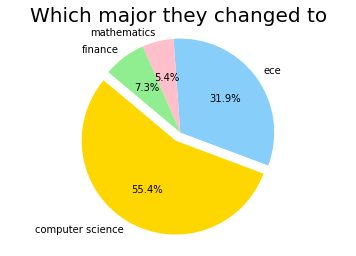

In [29]:
# Data to plot
labels ='computer science','ece', 'mathematics','finance'
sizes = [csCount,eceCount + mldsCount, maCount, financeCount]
colors = ['gold', 'lightskyblue', 'pink', 'lightgreen']
explode = (.1,0,0,0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=False, startangle=140)

plt.axis('equal')
plt.title('Which major they changed to', fontsize = 20)

Text(0.5, 1.0, 'How many students change their major')

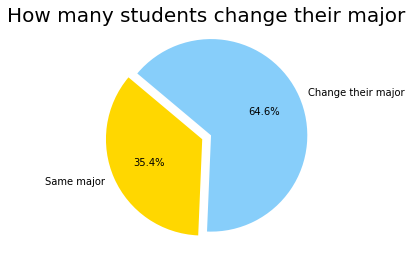

In [30]:
# Data to plot
labels = 'Same major','Change their major'
sizes = [totalStudent - changeStudent, changeStudent]
colors = ['gold', 'lightskyblue']
explode = (0.1, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=False, startangle=140)

plt.axis('equal')
plt.title('How many students change their major', fontsize = 20)

In [31]:
changeToCs = majorChange['computer science']

In [32]:
changeToCsCount = {}

In [33]:
changeToCsCount['ece'] = 0

In [34]:

i = 0
leng = len(changeToCs)
while i < leng:
    m = changeToCs[i]
    if 'computer engineering' in m or 'electrical' in m or 'ece' in m or 'eecs' in m or 'electronic' in m or 'intelligent' in m or 'telecommunication' in m or 'communication' in m:
        print(m)
        changeToCsCount['ece'] += 1
        
        changeToCs.remove(m)
        leng -= 1
        continue
    i += 1

computer engineering
computer engineering
electronics and electric engineering & computer science
electrical engineering
computer engineering
communication engineering
computer science, computer engineering
computer engineering
electronic information science and technology
electrical engineering
electronics and information engineering
computer engineering
electronic information engineering
electrical engineering
microelectronic science and engineering
eecs
electrical and electronics engineering
electronic engineering
electrical engineering
electrical and information engineering
electrical engineering technologies/technicians
electrical and electronics engineering
electrical and computer engineering
electrical and electronics engineering
electrical and electronics engineering
microelectronics(computer architecture)
electronic information science and technology
electrical engineering
electrical and computer engineering
electrical and electronics engineering
electrical and computer engine

In [35]:
changeToCsCount

{'ece': 84}

In [36]:
len(changeToCs)

156

In [37]:
changeToCsCount['ma'] = 0

In [38]:
i = 0
leng = len(changeToCs)
while i < leng:
    m = changeToCs[i]
    if 'mathematics' in m or 'computational' in m or 'mathematical' in m or 'statistics' in m or 'computitional' in m:
        print(m)
        changeToCsCount['ma'] += 1
        
        changeToCs.remove(m)
        leng -= 1
        continue
    i += 1

mathematics and computer science
mathematics and computer science
financial mathematics
mathematics and computer science
computing and data analytics, minor in mathematics
double majors in b.s. computer science, b.s. mathematics
applied & computational math sciences
mathematics
advanced level: mathematics, physics, computerscience, economics
statistics
mathematics and information engineering
mathematics and computer science
double major in applied mathematics and finance
computational mathematics
mathematics and computer science
mathematics


In [39]:
changeToCsCount

{'ece': 84, 'ma': 16}

In [40]:
changeToCsCount['cs related'] = 0

In [41]:
i = 0
leng = len(changeToCs)
while i < leng:
    m = changeToCs[i]
    if 'computer science' in m or 'software' in m or 'information' in m:
        print(m)
        changeToCsCount['cs related'] += 1
        
        changeToCs.remove(m)
        leng -= 1
        continue
    i += 1

computer science and technology
computer software engineering
computer software engineering
information engineering
information engineering
computer science and engineering 
computer science information engineering, industrial and information management (double major)
computer science and enginering
computer software engineering
computer software engineering
computer science and technology
information systems  
computer software engineering
computer software engineering
computer software engineering
computer science and engineering
computer science (ieee honor class)
information engineering
computer science and engineering
software engineering
software engineering
information engineering
mechanical engineering, minor in computer science
mechanical engineering, minor in computer science
computer science and engineering
software engineering
computer science and cognitive science
computer software engineering
computer science and engineering
computer science and technology
biochemistry & 

In [42]:
changeToCsCount['finance'] = 0

In [43]:
i = 0
leng = len(changeToCs)
while i < leng:
    m = changeToCs[i]
    if 'business' in m or 'analytics' in m or 'finance' in m or 'economics' in m:
        print(m)
        changeToCsCount['finance'] += 1
        
        changeToCs.remove(m)
        leng -= 1
        continue
    i += 1

business administration and management, general
economics
the elite program of finance, an honors program for the top 10% of student
economics
international business
finance, general
finance, general
economics
business administration and management, general
korean language and literature | technology business management
economics
economics
data science, business & finance
business administration and management, general
finance


In [44]:
changeToCsCount

{'ece': 84, 'ma': 16, 'cs related': 73, 'finance': 15}

In [45]:
len(changeToCs)

52

In [46]:
changeToCsCount

{'ece': 84, 'ma': 16, 'cs related': 73, 'finance': 15}

In [49]:
%matplotlib
labels = 'ece', 'other', 'mathematics', 'finance'
sizes = [changeToCsCount['ece'], len(changeToCs), changeToCsCount['ma'], changeToCsCount['finance']]
colors = ['gold', 'lightskyblue', 'pink', 'lightgreen']
explode = (.1,0,0,0)  # explode 1st slice

# Plot

patches,l_text,p_text = plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', shadow=False, startangle=140)

for t in l_text:
    t.set_size=(120)
for t in p_text:
    t.set_size=(120)

plt.axis('equal')


Using matplotlib backend: Qt5Agg


(-1.1756823653069808,
 1.1171621295261829,
 -1.1897488533780884,
 1.105016107166773)